## 영단어 키워드 분석

### 패키지 설치

In [1]:
# wordcloud 패키지 설치
!pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 4.5 MB/s eta 0:00:00


In [2]:
# 자연어처리 패키지 설치
!pip install nltk

     ---------------------------------------- 1.5/1.5 MB 13.5 MB/s eta 0:00:00
     ------------------------------------- 262.7/262.7 kB 15.8 MB/s eta 0:00:00
     ---------------------------------------- 78.4/78.4 kB ? eta 0:00:00
     ---------------------------------------- 96.6/96.6 kB 5.8 MB/s eta 0:00:00
     ------------------------------------- 307.0/307.0 kB 18.5 MB/s eta 0:00:00


### 패키지 import

In [17]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

#### NLTK 리소스를 최초 한 번 다운로드

In [4]:
import nltk

In [5]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [6]:
# 파일병합
all_files = glob.glob('./data/myCabinetExcelData*.xls')
all_files

['./data\\myCabinetExcelData (1).xls',
 './data\\myCabinetExcelData (2).xls',
 './data\\myCabinetExcelData (3).xls',
 './data\\myCabinetExcelData (4).xls',
 './data\\myCabinetExcelData.xls']

In [8]:
!pip install xlrd

  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)


In [12]:
all_data = []

for file in all_files:
    df = pd.read_excel(file)
    all_data.append(df)

all_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Agricultural Disaster Risk Management and Capa...,"Wang, Caili; Gao, Yuwen; Aziz, Asad; Ogunmola,...",Mary Ann Leibert,2022
1,NaN,2,Big data ensemble clinical prediction for heal...,"Rallapalli, Sreekanth; Gondkar, R.R.",Inderscience,2018
2,NaN,3,Big Data and Predictive Analytics in Health Care,unknown,Mary Ann Leibert,2014
3,NaN,4,Big Data As an Enabler of Primary Education,unknown,Mary Ann Leibert,2016
4,NaN,5,Correction to: Big Data 2016;4:60–66,unknown,Mary Ann Leibert,2016
...,...,...,...,...,...,...
95,NaN,96,A reference architecture for big data solution...,"Geerdink, Bas",Inderscience,2015
96,NaN,97,Big Earth Data: a comprehensive analysis of vi...,"Merritt, Patrick; Bi, Haixia; Davis, Bradley; ...",John Wiley & Sons Ltd,2018
97,NaN,98,Big Earth data: A new frontier in Earth and in...,"Guo, Huadong",John Wiley & Sons Ltd,2017
98,NaN,99,GSio: A programmatic interface for delivering ...,"Larraondo, Pablo R.; Pringle, Sean; Guo, Jian;...",John Wiley & Sons Ltd,2017


In [13]:
all_data_concat = pd.concat(all_data, axis=0, ignore_index=True)
all_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Agricultural Disaster Risk Management and Capa...,"Wang, Caili; Gao, Yuwen; Aziz, Asad; Ogunmola,...",Mary Ann Leibert,2022
1,NaN,2,Big data ensemble clinical prediction for heal...,"Rallapalli, Sreekanth; Gondkar, R.R.",Inderscience,2018
2,NaN,3,Big Data and Predictive Analytics in Health Care,unknown,Mary Ann Leibert,2014
3,NaN,4,Big Data As an Enabler of Primary Education,unknown,Mary Ann Leibert,2016
4,NaN,5,Correction to: Big Data 2016;4:60–66,unknown,Mary Ann Leibert,2016
...,...,...,...,...,...,...
495,NaN,96,Artificial Bee Colony Reinforced Extended Kalm...,"Raghav, R. Srinivasa; Thirugnanasambandam, Kal...",Mary Ann Leibert,2022
496,NaN,97,Why Big Data = Big Deal,unknown,Mary Ann Leibert,2014
497,NaN,98,Big Data 2.0: Cataclysm or Catalyst?,unknown,Mary Ann Leibert,2014
498,NaN,99,Curating Big Data Made Simple: Perspectives fr...,unknown,Mary Ann Leibert,2014


In [14]:
all_data_concat.to_csv('./data/riss_bigdata.csv', index=False, encoding='utf-8')

#### 데이터 전처리

In [16]:
all_title = all_data_concat['제목']
all_title

0      Agricultural Disaster Risk Management and Capa...
1      Big data ensemble clinical prediction for heal...
2       Big Data and Predictive Analytics in Health Care
3            Big Data As an Enabler of Primary Education
4                   Correction to: Big Data 2016;4:60–66
                             ...                        
495    Artificial Bee Colony Reinforced Extended Kalm...
496                              Why Big Data = Big Deal
497                 Big Data 2.0: Cataclysm or Catalyst?
498    Curating Big Data Made Simple: Perspectives fr...
499                       The Uses of Big Data in Cities
Name: 제목, Length: 500, dtype: object

In [19]:
stopWords = set(stopwords.words('english'))
stopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [20]:
lemma = WordNetLemmatizer()   # 객체 생성
lemma

<WordNetLemmatizer>

In [27]:
words = []

for title in all_title:
    EnWords = re.sub(r'[^a-zA-Z]+', ' ', str(title))   # ^을 밖에 넣냐 안에 넣냐에 따라 결과가 달라짐
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]   # 불용어 제거
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    
    words.append(EnWordsTokenStopLemma)

In [28]:
# 불용어 제거하고 남은 키워드 단어만 남음
print(words)

[['agricultural', 'disaster', 'risk', 'management', 'capability', 'assessment', 'using', 'big', 'data', 'analytics'], ['big', 'data', 'ensemble', 'clinical', 'prediction', 'healthcare', 'data', 'using', 'deep', 'learning', 'model'], ['big', 'data', 'predictive', 'analytics', 'health', 'care'], ['big', 'data', 'enabler', 'primary', 'education'], ['correction', 'big', 'data'], ['unsupervised', 'tensor', 'mining', 'big', 'data', 'practitioner'], ['comparison', 'scalability', 'batch', 'big', 'data', 'processing', 'apache', 'spark', 'apache', 'flink'], ['call', 'special', 'issue', 'paper', 'deep', 'learning', 'assisted', 'big', 'data', 'analytics', 'biomedical', 'application', 'digital', 'healthcare'], ['call', 'special', 'issue', 'paper', 'big', 'data', 'business'], ['big', 'data', 'analytics', 'data', 'management', 'perspective', 'public', 'administration'], ['exploiting', 'reused', 'based', 'sharing', 'work', 'opportunity', 'big', 'data', 'multiquery', 'optimization', 'flink'], ['using',

In [30]:
# 2차원 리스트 → 1차원 리스트로 축소
words_reduce = list(reduce(lambda x, y: x+y, words))
print(words_reduce)

['agricultural', 'disaster', 'risk', 'management', 'capability', 'assessment', 'using', 'big', 'data', 'analytics', 'big', 'data', 'ensemble', 'clinical', 'prediction', 'healthcare', 'data', 'using', 'deep', 'learning', 'model', 'big', 'data', 'predictive', 'analytics', 'health', 'care', 'big', 'data', 'enabler', 'primary', 'education', 'correction', 'big', 'data', 'unsupervised', 'tensor', 'mining', 'big', 'data', 'practitioner', 'comparison', 'scalability', 'batch', 'big', 'data', 'processing', 'apache', 'spark', 'apache', 'flink', 'call', 'special', 'issue', 'paper', 'deep', 'learning', 'assisted', 'big', 'data', 'analytics', 'biomedical', 'application', 'digital', 'healthcare', 'call', 'special', 'issue', 'paper', 'big', 'data', 'business', 'big', 'data', 'analytics', 'data', 'management', 'perspective', 'public', 'administration', 'exploiting', 'reused', 'based', 'sharing', 'work', 'opportunity', 'big', 'data', 'multiquery', 'optimization', 'flink', 'using', 'big', 'data', 'unders

In [31]:
count = Counter(words_reduce)
count

Counter({'agricultural': 3,
         'disaster': 6,
         'risk': 4,
         'management': 15,
         'capability': 4,
         'assessment': 4,
         'using': 29,
         'big': 521,
         'data': 565,
         'analytics': 88,
         'ensemble': 3,
         'clinical': 3,
         'prediction': 7,
         'healthcare': 8,
         'deep': 9,
         'learning': 24,
         'model': 26,
         'predictive': 4,
         'health': 14,
         'care': 5,
         'enabler': 1,
         'primary': 1,
         'education': 6,
         'correction': 3,
         'unsupervised': 1,
         'tensor': 4,
         'mining': 14,
         'practitioner': 1,
         'comparison': 2,
         'scalability': 1,
         'batch': 1,
         'processing': 19,
         'apache': 4,
         'spark': 5,
         'flink': 2,
         'call': 29,
         'special': 32,
         'issue': 36,
         'paper': 28,
         'assisted': 3,
         'biomedical': 3,
         'applicatio

In [50]:
word_count = dict()

# 상위 50개 단어에서만 추린다
for tag, counts in count.most_common(30):
    if len(str(tag)) > 1:
        word_count[tag] = counts
        # print(f'{tag} : {counts}')
    
word_count

{'data': 565,
 'big': 521,
 'analytics': 88,
 'based': 47,
 'analysis': 40,
 'issue': 36,
 'system': 36,
 'special': 32,
 'approach': 32,
 'using': 29,
 'call': 29,
 'paper': 28,
 'model': 26,
 'framework': 26,
 'learning': 24,
 'driven': 24,
 'application': 23,
 'earth': 22,
 'processing': 19,
 'platform': 19,
 'cloud': 18,
 'perspective': 17,
 'science': 17,
 'distributed': 16,
 'computing': 16,
 'management': 15,
 'machine': 15,
 'smart': 15,
 'new': 15,
 'health': 14}

#### 단어 갯수 차트

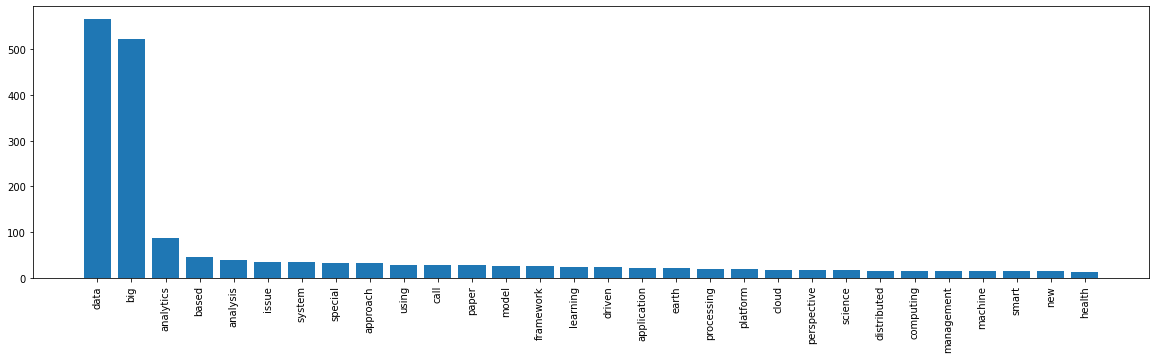

In [51]:
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.figure(figsize=(20, 5))
plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=90)
plt.show()

#### 결과 시각화

In [55]:
all_data_concat['doc_count'] = 0
summary_year = all_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year

,출판일,doc_count
0,1999,1
1,2004,1
2,2011,1
3,2012,8
4,2013,12
5,2014,44
6,2015,43
7,2016,73
8,2017,78
9,2018,67


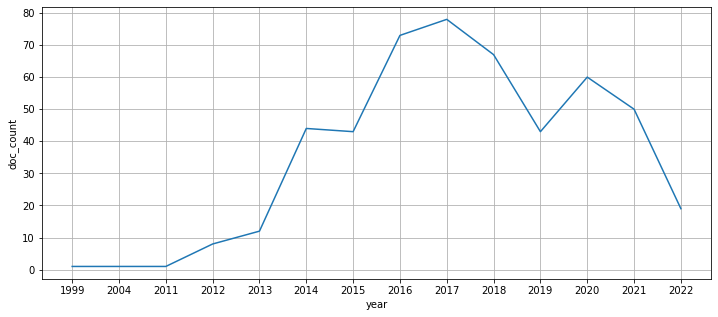

In [56]:
plt.figure(figsize=(12, 5))
plt.xlabel('year')
plt.ylabel('doc_count')
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

##### 워드클라우드 만들기

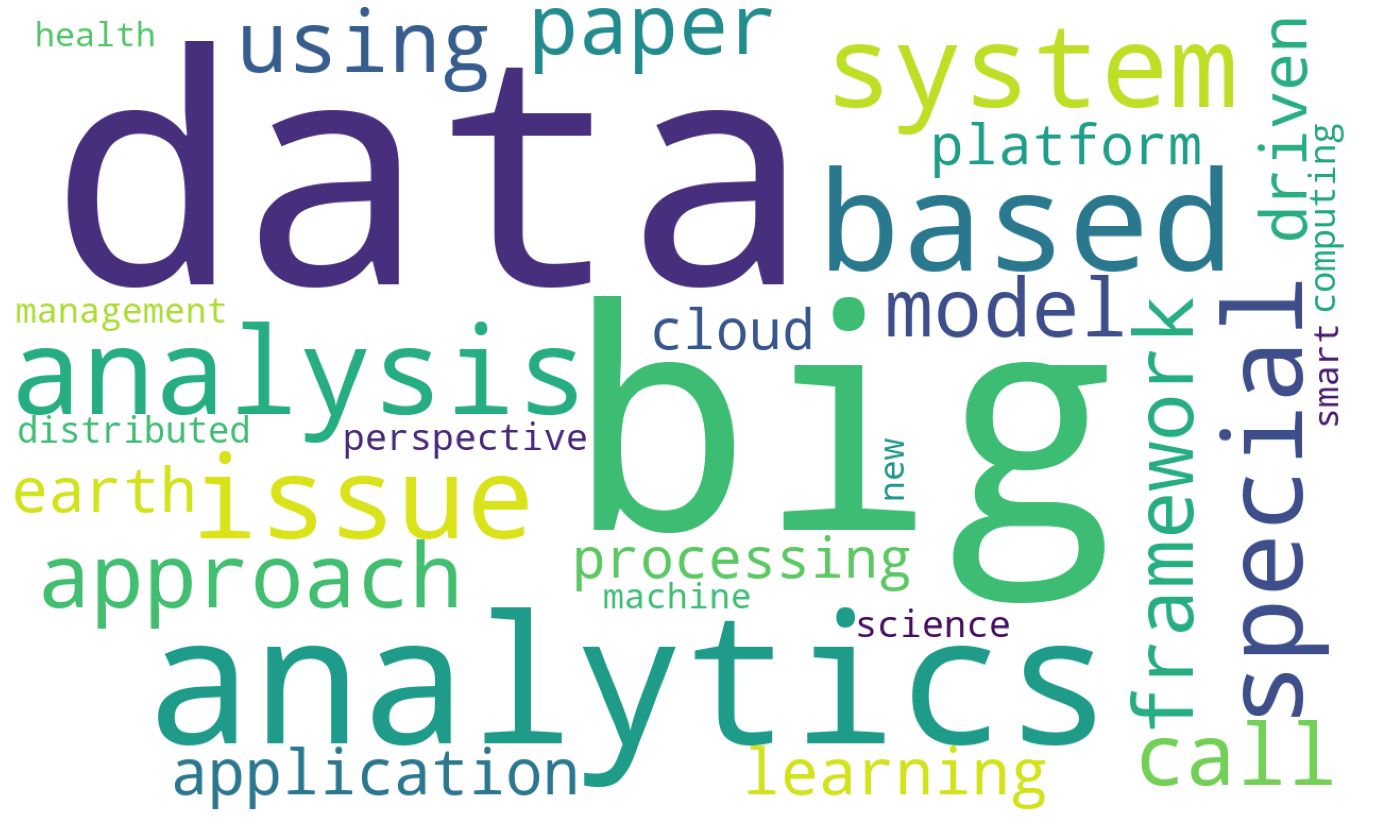

In [65]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color='#FFFFFF', stopwords=stopwords, width=1280, height=768)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(40, 15))
plt.imshow(cloud)   # 이미지 만들 때 쓰는 것
plt.axis('off')
plt.show()

In [66]:
cloud.to_file('./data/riss_bigdata_wordcloud.png')